In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ROOT_PATH = "../../../desarrollo/"

DATASET_FOLDER = ROOT_PATH + "Audio_Data/"

/tmp/ipykernel_2266321/3226718387.py:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


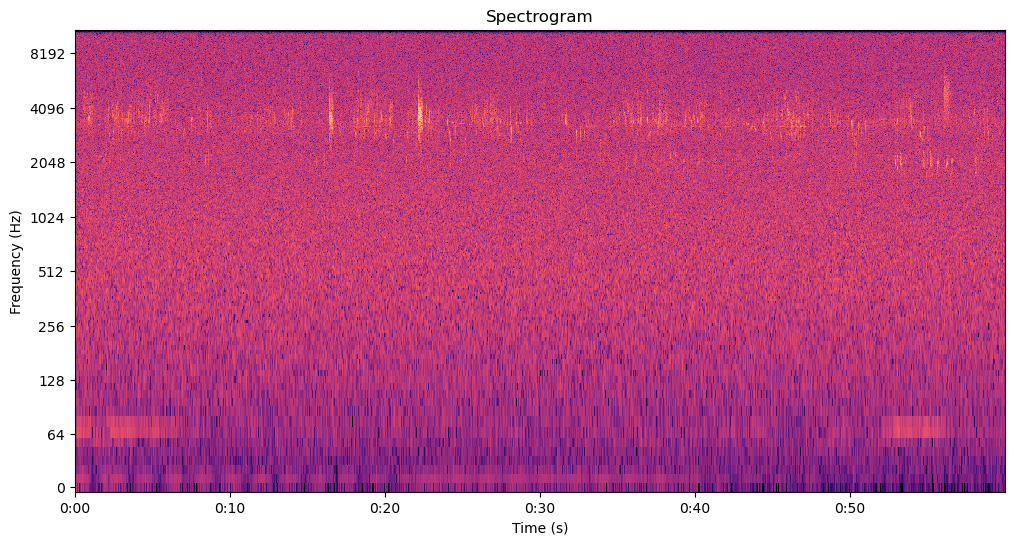

In [28]:
# Define the path to the audio file you want to process
audio_file = DATASET_FOLDER + "AM4/2023_06_01/Audios/AM4_20230601_093000.WAV"
# Load the audio
y, sr = librosa.load(audio_file)

# Create the spectrogram without axis scales and color bar
# Define the frequency range
fmin = 1  # Minimum frequency (0 Hz)
fmax = 16000  # Maximum frequency (32000 Hz)

# Create the spectrogram without axis scales and color bar
plt.figure(figsize=(12, 6))  # Set the background color to black
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax)  # Specify frequency range

# Set it in grayscale
# plt.set_cmap('gray')

# Remove axis labels and color bar
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
#plt.axis('off')

# Save the figure without a frame or border
plt.savefig('spectrogram.jpg', bbox_inches='tight', pad_inches=0, format='jpg')

plt.show()

/home/alba_marquez/.conda/envs/BIRDeep_TFM_Alba/lib/python3.11/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


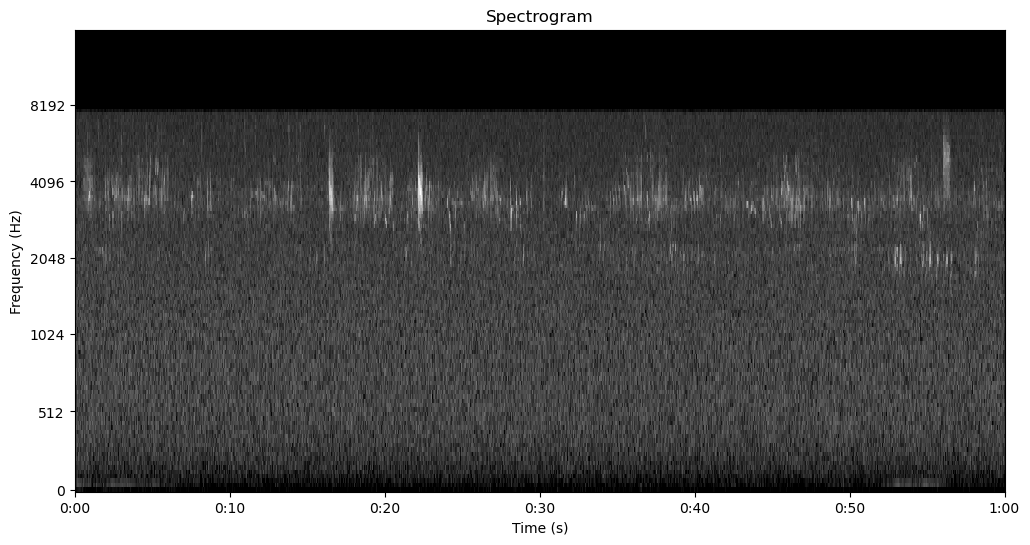

In [24]:
# Define the path to the audio file you want to process
audio_file = DATASET_FOLDER + "AM4/2023_06_01/Audios/AM4_20230601_093000.WAV"

# Define the frequency range
fmin = 1  # Minimum frequency (0 Hz)
fmax = 16000  # Maximum frequency (32000 Hz)

# Load the audio
y, sr = librosa.load(audio_file, sr=fmax, duration=60)

# Create the spectrogram without axis scales and color bar

# Create the spectrogram without axis scales and color bar, set background to red
plt.figure(figsize=(12, 6))  # Set the background color to black
# D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
#librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax)  # Specify frequency range
S = librosa.feature.melspectrogram(y=y, sr=sr, fmin=fmin, fmax=fmax)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmin=fmin, fmax=fmax)

# Grayscale
plt.set_cmap('gray')

# Legend axis
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')

# Remove axis labels and color bar
# plt.axis('off')

# Save the figure without a frame or border
plt.savefig('spectrogram.jpg', bbox_inches='tight', pad_inches=0, format='jpg')

plt.show()

In [4]:
# Function to create spectrogram images
def create_spectrogram(audio_file):
    y, sr = librosa.load(audio_file)
    
    # Create the output path for the image
    output_image_path = audio_file.replace('Audios/', '')
    output_image_path = output_image_path.replace(".WAV", ".jpg")
    output_image_path = output_image_path.replace("Audio_Data", "Data/Dataset/Images")
    
    # Ensure the output folder exists
    os.makedirs(os.path.dirname(output_image_path), exist_ok=True)
    
    # Define the frequency range
    fmin = 1  # Minimum frequency (0 Hz)
    fmax = 16000  # Maximum frequency (32000 Hz)
    
    # Create the spectrogram without axis scales and color bar
    plt.figure(figsize=(12, 6))  # Set the background color to black
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", fmin=fmin, fmax=fmax)  # Specify frequency range
    plt.axis('off')  # Remove axes
    plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Recursively iterate through all subdirectories and audio files
    
# Divide DATASET_FOLDER content in BATCH_NUMBER of batches
BATCH_NUMBER = 10
audio_files = []
for root, dirs, files in os.walk(DATASET_FOLDER):
    for file in files:
        if file.endswith('.WAV'):
            audio_files.append(os.path.join(root, file))
        
# Create the spectrogram images, do first one batch, print batch X done and continue with the next
for i in range(7, BATCH_NUMBER):
    print(f"Batch {i+1} of {BATCH_NUMBER}")
    for audio_file in tqdm(audio_files[i::BATCH_NUMBER]):
        create_spectrogram(audio_file)
    print(f"Batch {i+1} done")

print("All batches done")

Batch 8 of 10


  0%|          | 0/121 [00:00<?, ?it/s]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


  1%|          | 1/121 [00:01<03:03,  1.53s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 2/121 [00:03<03:01,  1.53s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 3/121 [00:04<03:01,  1.54s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  3%|▎         | 4/121 [00:06<03:00,  1.54s/it]/tmp/ipykernel_1276216/

Batch 8 done
Batch 9 of 10


  0%|          | 0/121 [00:00<?, ?it/s]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  1%|          | 1/121 [00:01<03:04,  1.54s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 2/121 [00:03<03:02,  1.53s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 3/121 [00:04<03:00,  1.53s/it]/tmp/ipykernel_1276216/63165239

Batch 9 done
Batch 10 of 10


  0%|          | 0/121 [00:00<?, ?it/s]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  1%|          | 1/121 [00:01<03:01,  1.51s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 2/121 [00:03<03:01,  1.52s/it]/tmp/ipykernel_1276216/631652392.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
  2%|▏         | 3/121 [00:04<02:59,  1.52s/it]/tmp/ipykernel_1276216/63165239

Batch 10 done
All batches done
